# Problem 3

In [1]:
import random
from matplotlib import pyplot as plt

# Quicksort

In [2]:
class QuickSort:
    def __init__(self, arr):
        self.arr = arr
        self.arr_len = len(arr)
        self.comparisons = 0
    
    def partition(self, left_idx, right_idx):
        pivot = self.arr[left_idx]
        i = left_idx + 1
        for j in range(left_idx + 1, right_idx):
            if self.arr[j] < pivot:
                self.comparisons += 1
                self.arr[j], self.arr[i] = self.arr[i], self.arr[j]
                i += 1
        self.arr[left_idx], self.arr[i - 1] = self.arr[i - 1], self.arr[left_idx]
        return i - 1

    def quicksort_random(self, left, right):
        if left < right:
            pivot = random.randint(left, right - 1)
            self.arr[pivot], self.arr[left] = (self.arr[left], self.arr[pivot])
            pivot_idx = self.partition(left, right)
            self.quicksort_random(left, pivot_idx)
            self.quicksort_random(pivot_idx + 1, right) 
            
    def sort(self):
        self.quicksort_random(0, self.arr_len)
    
    def get_num_of_comparisons(self):
        return self.comparisons

# Mergesort

In [3]:
class MergeSort:
    def __init__(self, arr):
        self.arr = arr
        self.arr_len = len(arr)
        self.comparisons = 0
    
    def merge(self, left, mid, right):
        num1 = mid - left + 1
        num2 = right - mid
        left_array = []
        right_array = []

        for i in range(num1):
            left_array.append(self.arr[left + i])
        for j in range(num2):
            right_array.append(self.arr[mid + 1 + j])

        i = 0     
        j = 0   
        k = left

        while i < num1 and j < num2:
            if left_array[i] <= right_array[j]:
                self.comparisons += + 1
                self.arr[k] = left_array[i]
                i += 1
            else:
                self.arr[k] = right_array[j]
                j += 1
            k += 1

        while i < num1:
            self.arr[k] = left_array[i]
            i += 1
            k += 1

        while j < num2:
            self.arr[k] = right_array[j]
            j += 1
            k += 1

    def mergesort(self, left, right):
        if left < right:
            mid = left + (right - left) // 2
            self.mergesort(left, mid)
            self.mergesort(mid + 1, right)
            self.merge(left, mid, right)
            
    def sort(self):
        self.mergesort(0, self.arr_len - 1)
    
    def get_num_of_comparisons(self):
        return self.comparisons

# Random Vector Generation

In [4]:
def generate_rand_vector(n):
    randomlist = []
    for i in range(n):
        rand_num = random.random()
        randomlist.append(rand_num)
    return randomlist

# Experiments

In [5]:
quicksort_comparisons = []
mergesort_comparisons = []

qcksort = None
mersort = None

for i in range(1, 1001):
    run = i - 1
    quicksort_comparisons.append(0)
    mergesort_comparisons.append(0)
    for j in range(1000):
        nums = generate_rand_vector(i)
        
        qcksort = QuickSort(nums)
        qcksort.sort()
        quicksort_comparisons[run] += qcksort.get_num_of_comparisons() 
        
        mersort = MergeSort(nums)
        mersort.sort()
        mergesort_comparisons[run] += mersort.get_num_of_comparisons()

In [6]:
x = list(range(1, 1001))

In [7]:
q = [x / 1000 for x in quicksort_comparisons]
m = [x / 1000 for x in mergesort_comparisons]

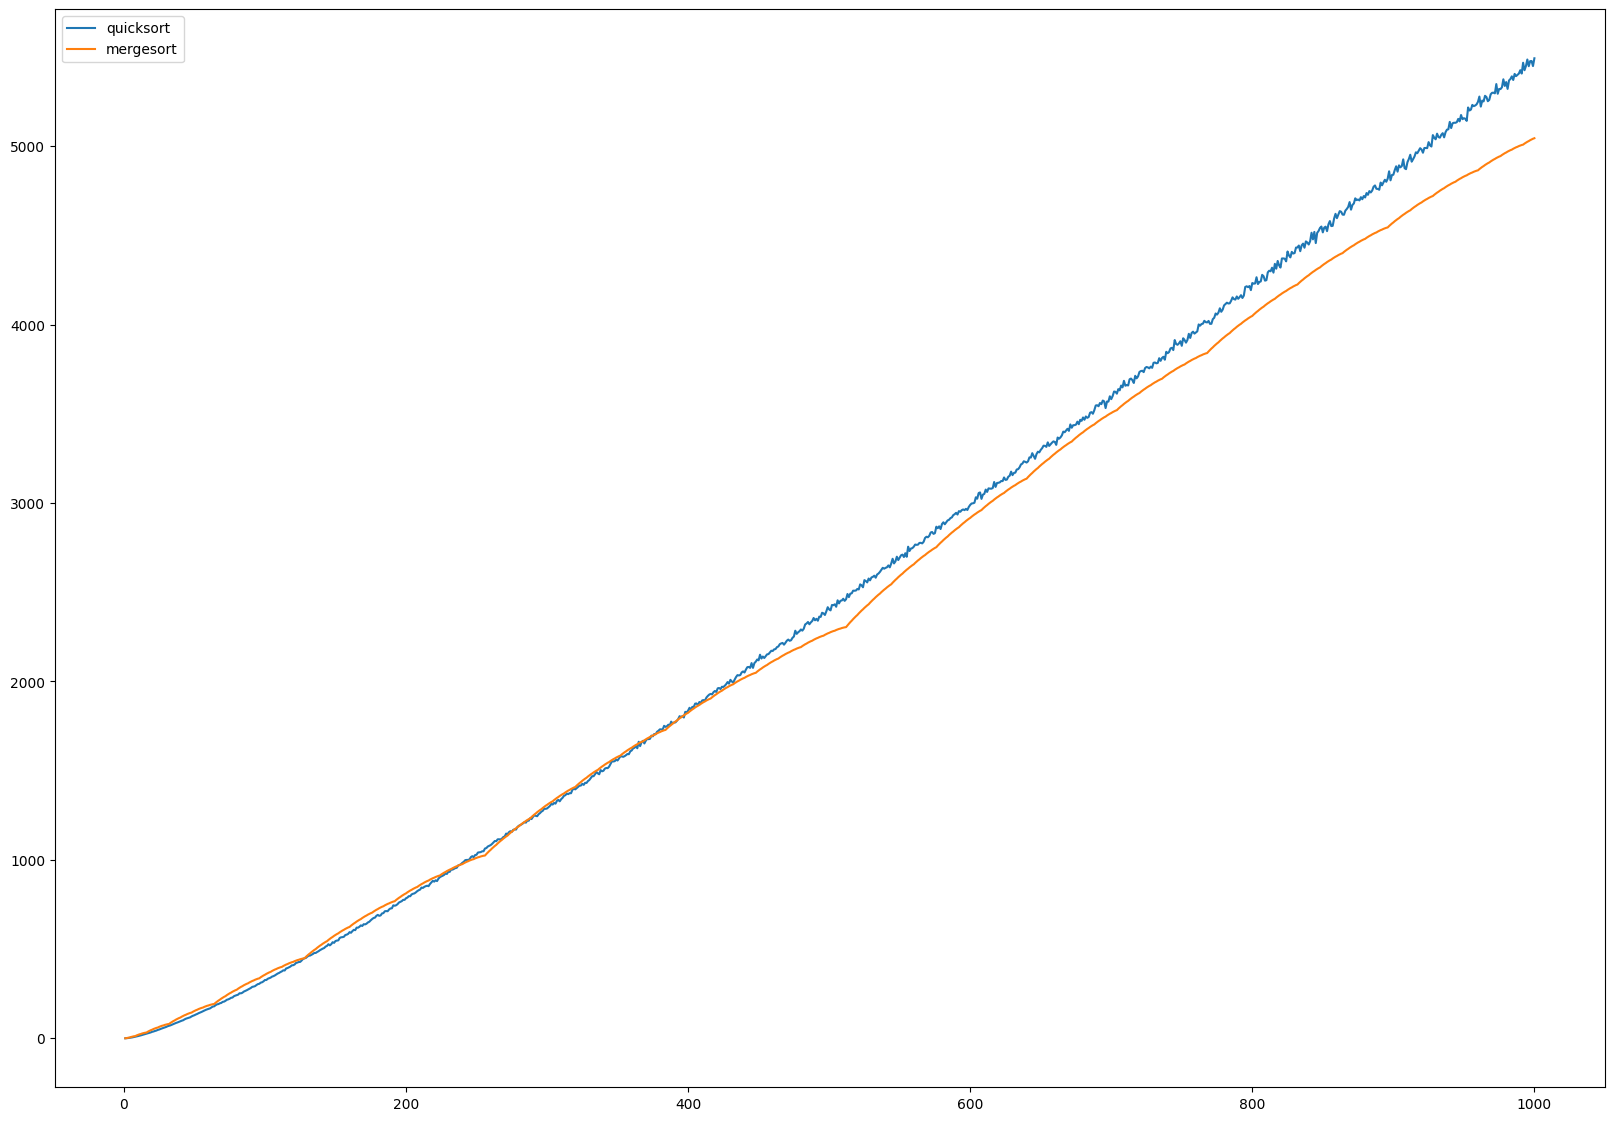

In [8]:
plt.rcParams["figure.figsize"] = (20 , 14)
plt.plot(x, q, label='quicksort')
plt.plot(x, m, label='mergesort')
plt.legend()